# Superstore Sales Analysis — SQL Case Study

**Author:** Krupal Joshi    
**Role:** Data Analyst  
**Tools:** SQL (SQLite), Python, Pandas, Matplotlib  
**Platform:** Kaggle

## Project Objective
To analyze sales performance of a retail superstore using SQL by identifying key revenue drivers, customer behavior, and regional trends.

## Key Questions Answered
- Which products and categories drive the most revenue?
- How does revenue vary over time (year/month)?
- Who are the top customers?
- Which regions contribute most to sales?
- How do discounts impact profitability?

## Key Insights
- Revenue is highly concentrated among top products and customers.
- Sales show clear seasonal patterns across months.
- Certain regions consistently outperform others.
- High discounts reduce profit margins beyond a threshold.

## Outputs
- SQL query results
- Downloadable CSV files
- Saved charts (PNG) for reporting


In [27]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

In [28]:
csv_path="C:\\Users\\Krupal\\Downloads\\archive\\Sample - Superstore.csv"

In [29]:
df=pd.read_csv(csv_path,encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [31]:
print("rows,cols:", df.shape)

rows,cols: (9994, 21)


In [32]:
# create sqlite DB file in working directory
conn=sqlite3.connect('C:\\Users\\Krupal\\Downloads\\Sample-Superstore.db')

In [33]:
df.to_sql('superstore',conn, if_exists='replace', index=False)

9994

In [34]:
#check Tables
q="select name from sqlite_master where type='table';"
print(pd.read_sql(q,conn))

         name
0  superstore


In [35]:
schema=pd.read_sql("PRAGMA table_info('superstore');",conn)
display(schema)

,cid,name,type,notnull,dflt_value,pk
0,0,Row ID,INTEGER,0,None,0
1,1,Order ID,TEXT,0,None,0
2,2,Order Date,TEXT,0,None,0
3,3,Ship Date,TEXT,0,None,0
4,4,Ship Mode,TEXT,0,None,0
5,5,Customer ID,TEXT,0,None,0
6,6,Customer Name,TEXT,0,None,0
7,7,Segment,TEXT,0,None,0
8,8,Country,TEXT,0,None,0
9,9,City,TEXT,0,None,0


In [36]:
display(pd.read_sql("select * from superstore limit 10;",conn))

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7,0.00,14.17
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.28,4,0.00,1.97
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.15,6,0.20,90.72
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3,0.20,5.78
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.90,5,0.00,34.47


In [37]:
# KPIs - total sales, total orders, unique customers
q="""
select sum(Sales) as Total_Sales,
count(Distinct "Order ID") as Total_Orders,
count(Distinct "Customer ID") as unique_cutomers
from superstore;
"""
pd.set_option('display.float_format', '{:,.2f}'.format)
print(pd.read_sql(q, conn))


   Total_Sales  Total_Orders  unique_cutomers
0 2,297,200.86          5009              793


### Question 1: Which products generate the highest revenue?

**Approach:**  
Used SQL `GROUP BY` on Product Name and calculated total sales.

**Key Findings:**  
- Top 10 products contribute a significant portion of total revenue.
- Revenue is highly concentrated among a small set of products.

**Business Insight:**  
Focus inventory planning and promotions on top-performing products to maximize revenue impact.


In [38]:
# top 10 products by sales
q="""
select "Product Name" as product, sum(sales) as revenue
from superstore
group by product
order by revenue desc
limit 10"""

top_products=pd.read_sql(q,conn)
display(top_products)

,product,revenue
0,Canon imageCLASS 2200 Advanced Copier,"61,599.82"
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,"27,453.38"
2,Cisco TelePresence System EX90 Videoconferenci...,"22,638.48"
3,HON 5400 Series Task Chairs for Big and Tall,"21,870.58"
4,GBC DocuBind TL300 Electric Binding System,"19,823.48"
5,GBC Ibimaster 500 Manual ProClick Binding System,"19,024.50"
6,Hewlett Packard LaserJet 3310 Copier,"18,839.69"
7,HP Designjet T520 Inkjet Large Format Printer ...,"18,374.90"
8,GBC DocuBind P400 Electric Binding System,"17,965.07"
9,High Speed Automatic Electric Letter Opener,"17,030.31"


### Question: Which categories and sub-categories generate the highest revenue?

**Approach:**  
Used SQL aggregation (`GROUP BY Category, Sub-Category`) to calculate total revenue for each product sub-category and sorted the results in descending order.

**Key Findings:**  
- Technology → Phones is the highest revenue-generating sub-category, closely followed by Furniture → Chairs.  
- Revenue is concentrated among a few sub-categories, with Technology and Furniture dominating the top positions.  
- Several Office Supplies sub-categories contribute relatively low revenue compared to others.

**Business Insight:**  
Prioritize inventory planning, promotions, and pricing strategies for high-performing sub-categories such as Phones and Chairs. Low-revenue sub-categories can be evaluated for cost optimization, bundling, or targeted promotions.


In [39]:
# revenue by category and sub-category
q="""
select Category, "Sub-Category", sum(sales) as Revenue
from superstore
group by Category, "Sub-Category"
order by Revenue desc"""

display(pd.read_sql(q,conn))

,Category,Sub-Category,Revenue
0,Technology,Phones,"330,007.05"
1,Furniture,Chairs,"328,449.10"
2,Office Supplies,Storage,"223,843.61"
3,Furniture,Tables,"206,965.53"
4,Office Supplies,Binders,"203,412.73"
5,Technology,Machines,"189,238.63"
6,Technology,Accessories,"167,380.32"
7,Technology,Copiers,"149,528.03"
8,Furniture,Bookcases,"114,880.00"
9,Office Supplies,Appliances,"107,532.16"


In [40]:
# revenue by year and month (make sure Order Date parsed)
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')
df.to_sql('superstore',conn,if_exists='replace',index=False)

q="""
select strftime('%Y',"Order Date") as year,
sum(sales) as Revenue
from superstore
group by year
order by year;
"""

display(pd.read_sql(q,conn))


,year,Revenue
0,2014,"484,247.50"
1,2015,"470,532.51"
2,2016,"609,205.60"
3,2017,"733,215.26"


In [41]:
# monthly for most recent year
q2="""
select strftime("%Y","Order Date") as year,
strftime("%m","Order Date") as month,
sum(Sales) as Revenue
from superstore
group by year, month
order by year, month"""

month_df=pd.read_sql(q2,conn).head(10)
display(month_df)

,year,month,Revenue
0,2014,01,"14,236.90"
1,2014,02,"4,519.89"
2,2014,03,"55,691.01"
3,2014,04,"28,295.35"
4,2014,05,"23,648.29"
5,2014,06,"34,595.13"
6,2014,07,"33,946.39"
7,2014,08,"27,909.47"
8,2014,09,"81,777.35"
9,2014,10,"31,453.39"


In [42]:
# top 10 customers by revenue
q="""
select "Customer Name", "Customer ID", sum(Sales) as Revenue
from superstore
group by "Customer Name", "Customer ID" 
Order by Revenue desc
"""
top_customers=pd.read_sql(q,conn).head(10)
display(top_customers)

,Customer Name,Customer ID,Revenue
0,Sean Miller,SM-20320,"25,043.05"
1,Tamara Chand,TC-20980,"19,052.22"
2,Raymond Buch,RB-19360,"15,117.34"
3,Tom Ashbrook,TA-21385,"14,595.62"
4,Adrian Barton,AB-10105,"14,473.57"
5,Ken Lonsdale,KL-16645,"14,175.23"
6,Sanjit Chand,SC-20095,"14,142.33"
7,Hunter Lopez,HL-15040,"12,873.30"
8,Sanjit Engle,SE-20110,"12,209.44"
9,Christopher Conant,CC-12370,"12,129.07"


In [43]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [44]:
# revenue by region/state/country
q1="""
select Region, sum(Sales) as Revenue , sum(Quantity) as qty
from superstore
group by Region
order by Revenue desc
"""
display(pd.read_sql(q1,conn))

q2="""
select State, sum(Sales) as Revenue, sum(Quantity) as qty
from superstore
group by Region
order by Revenue desc"""
display(pd.read_sql(q2,conn))

q3="""
select City, sum(Sales) as Revenue, sum(Quantity) as qty
from superstore
group by City
order by Revenue desc"""
display(pd.read_sql(q3,conn).head(10))

,Region,Revenue,qty
0,West,"725,457.82",12266
1,East,"678,781.24",10618
2,Central,"501,239.89",8780
3,South,"391,721.91",6209


,State,Revenue,qty
0,California,"725,457.82",12266
1,Pennsylvania,"678,781.24",10618
2,Texas,"501,239.89",8780
3,Kentucky,"391,721.91",6209


,City,Revenue,qty
0,New York City,"256,368.16",3417
1,Los Angeles,"175,851.34",2879
2,Seattle,"119,540.74",1590
3,San Francisco,"112,669.09",1935
4,Philadelphia,"109,077.01",1981
5,Houston,"64,504.76",1466
6,Chicago,"48,539.54",1132
7,San Diego,"47,521.03",670
8,Jacksonville,"44,713.18",429
9,Springfield,"43,054.34",649


In [45]:
# discount vs sales & average profit margin if profit exists
q4="""
select sum(Sales) as taotal_sales, avg(Discount) as avg_discount, sum(profit) as total_profit
from superstore
"""
display(pd.read_sql(q4,conn))

,taotal_sales,avg_discount,total_profit
0,"2,297,200.86",0.16,"286,397.02"


In [46]:
# orders per customer
q5="""
select count("Order ID") as number_of_orders, "Customer ID"
from superstore
group by "Customer ID"
order by number_of_orders desc
limit 30
"""
pd.read_sql(q5,conn)

,number_of_orders,Customer ID
0,37,WB-21850
1,34,PP-18955
2,34,MA-17560
3,34,JL-15835
4,32,SV-20365
5,32,JD-15895
6,32,EH-13765
7,32,CK-12205
8,31,ZC-21910
9,31,EP-13915


In [47]:
top_products.to_csv('top_products.csv', index=False)
top_customers.to_csv('top_customers.csv', index=False)
month_df.to_csv('monthly_revenue.csv', index=False)
print("Saved Csvs:")

Saved Csvs:


In [48]:
#charts
import matplotlib.pyplot as plt

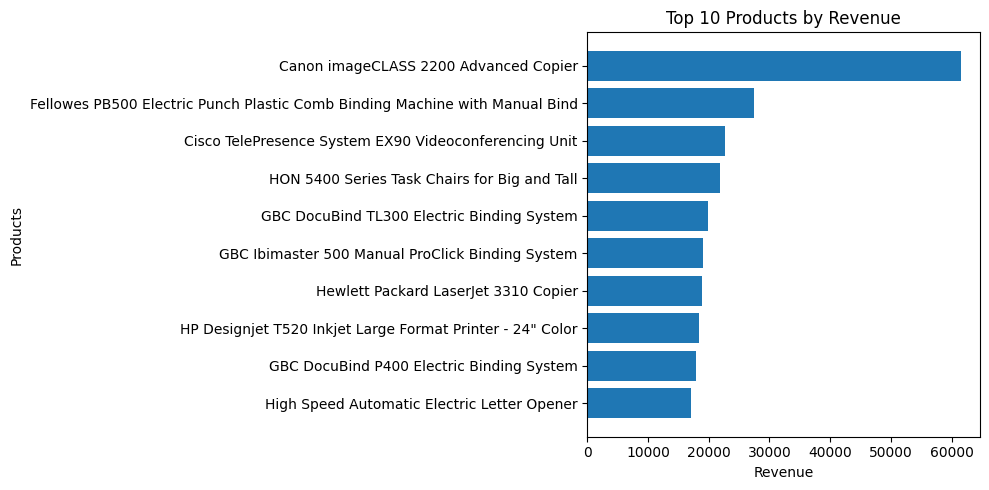

In [49]:
# top products bar
plt.figure(figsize=(10,5))
plt.barh(top_products['product'][::-1],top_products['revenue'][::-1])
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Products")
plt.tight_layout()
plt.savefig('top_products.png', dpi=150)
plt.show()


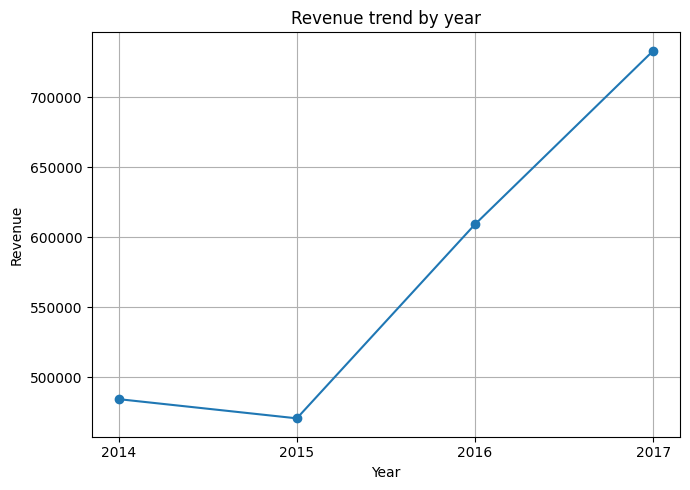

In [50]:
# revenue trend by year
yrs=pd.read_sql('select strftime("%Y","Order Date") as year, sum(Sales) as Revenue from superstore group by year order by year;',conn)
plt.figure(figsize=(7,5))
plt.plot(yrs['year'],yrs['Revenue'], marker='o')
plt.title("Revenue trend by year")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.grid(True) 
plt.tight_layout()
plt.savefig('Revenue_trend.png',dpi=150)
plt.show()